# 주제 : 미국의 대통령은 어떻게 뽑힐까?
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 US Election 2020 데이터셋을 사용합니다.
    
    - 총 11개의 파일 중 정보가 가장 많은 4개의 파일을 사용합니다.
    president_county_candidate.csv: 대통령 투표 결과
    governors_county_candidate.csv: 카운티 지사 투표 결과
    senate_county_candidate.csv: 상원의원 투표 결과
    house_candidate.csv: 하원의원 투표 결과
    
    - 각 파일의 컬럼은 아래와 같습니다.
    state: 주
    county: 카운티(군)
    district: 지구
    candidate: 후보자
    party: 후보자의 소속 정당
    total_votes: 득표 수
    won: 지역 투표 우승 여부
    
    
    
- 데이터 출처: https://www.kaggle.com/unanimad/us-election-2020
- 보조 데이터: https://www.kaggle.com/muonneutrino/us-census-demographic-data

## 최종 목표
    - 보조 데이터셋을 이용하여 데이터셋 보강하는 방법 이해
    - plotly를 이용한 Choropleth 시각화 방법 이해
    - Regression과 Classification의 차이 이해

- 출제자 : 신제용 강사
---

## Step 0. 데이터에 관한 사전 배경 지식

### 미국의 선거 제도에 대하여


### 2020 미국 선거 데이터셋 설명


### 2017 미국 인구조사 데이터셋(보조 데이터셋) 설명

## Step 1. 데이터셋 준비하기

In [1]:
!pip install geopandas==0.8.1
!pip install pyshp==2.1.2
!pip install shapely==1.7.1
!pip install plotly-geo==1.0.0

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [3]:
import os

In [4]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = 'fastcampuskim'
os.environ['KAGGLE_KEY'] = 'c939a1e37f5ca93b6406a66fc8bb08e5'

### 문제 2. 데이터 다운로드 및 압축 해제하기


In [5]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!kaggle datasets download -d unanimad/us-election-2020
!kaggle datasets download -d muonneutrino/us-census-demographic-data
!unzip '*.zip'

us-election-2020.zip: Skipping, found more recently modified local copy (use --force to force download)
us-census-demographic-data.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  us-census-demographic-data.zip
replace acs2015_census_tract_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: acs2015_census_tract_data.csv  
  inflating: acs2015_county_data.csv  
  inflating: acs2017_census_tract_data.csv  
  inflating: acs2017_county_data.csv  

Archive:  us-election-2020.zip
  inflating: governors_county.csv    
  inflating: governors_county_candidate.csv  
  inflating: governors_state.csv     
  inflating: house_candidate.csv     
  inflating: house_state.csv         
  inflating: president_county.csv    
  inflating: president_county_candidate.csv  
  inflating: president_state.csv     
  inflating: senate_county.csv       
  inflating: senate_county_candidate.csv  
  inflating: senate_state.csv        

2 archives were succes

### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [29]:
# from US Election 2020
df_pres = pd.read_csv('president_county_candidate.csv')
df_gov = pd.read_csv('governors_county_candidate.csv')

# from US Census 2017
df_census = pd.read_csv('acs2017_county_data.csv')

In [6]:
# State Code 관련 부가 자료
state_code = pd.read_html('https://www.infoplease.com/us/postal-information/state-abbreviations-and-state-postal-codes')[0]

## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 각 데이터프레임 구조 및 기초 통계 확인하기


In [7]:
# DataFrame에서 제공하는 메소드를 이용하여 각 데이터프레임의 구조 분석하기 (head(), info(), describe())
df_pres.head()

state             county      candidate party  total_votes    won
0  Delaware        Kent County      Joe Biden   DEM        44552   True
1  Delaware        Kent County   Donald Trump   REP        41009  False
2  Delaware        Kent County   Jo Jorgensen   LIB         1044  False
3  Delaware        Kent County  Howie Hawkins   GRN          420  False
4  Delaware  New Castle County      Joe Biden   DEM       195034   True

In [8]:
df_pres['candidate'].unique()

array(['Joe Biden', 'Donald Trump', 'Jo Jorgensen', 'Howie Hawkins',
       ' Write-ins', 'Gloria La Riva', 'Brock Pierce',
       'Rocky De La Fuente', 'Don Blankenship', 'Kanye West',
       'Brian Carroll', 'Ricki Sue King', 'Jade Simmons',
       'President Boddie', 'Bill Hammons', 'Tom Hoefling',
       'Alyson Kennedy', 'Jerome Segal', 'Phil Collins',
       ' None of these candidates', 'Sheila Samm Tittle', 'Dario Hunter',
       'Joe McHugh', 'Christopher LaFontaine', 'Keith McCormic',
       'Brooke Paige', 'Gary Swing', 'Richard Duncan', 'Blake Huber',
       'Kyle Kopitke', 'Zachary Scalf', 'Jesse Ventura', 'Connie Gammon',
       'John Richard Myers', 'Mark Charles', 'Princess Jacob-Fambro',
       'Joseph Kishore', 'Jordan Scott'], dtype=object)

In [9]:
df_gov.head()

state             county        candidate party   votes    won
0  Delaware        Kent County      John Carney   DEM   44352   True
1  Delaware        Kent County  Julianne Murray   REP   39332  False
2  Delaware        Kent County  Kathy DeMatteis   IPD    1115  False
3  Delaware        Kent County    John Machurek   LIB     616  False
4  Delaware  New Castle County      John Carney   DEM  191678   True

In [30]:
df_census.head()

CountyId    State          County  ...  SelfEmployed  FamilyWork  Unemployment
0      1001  Alabama  Autauga County  ...           5.6         0.1           5.2
1      1003  Alabama  Baldwin County  ...           6.3         0.1           5.5
2      1005  Alabama  Barbour County  ...           6.5         0.3          12.4
3      1007  Alabama     Bibb County  ...           6.3         0.3           8.2
4      1009  Alabama   Blount County  ...           4.0         0.1           4.9

[5 rows x 37 columns]

In [31]:
df_census['County'].value_counts()

Washington County        30
Jefferson County         25
Franklin County          24
Lincoln County           23
Jackson County           23
                         ..
West Feliciana Parish     1
Etowah County             1
Erath County              1
Jackson Parish            1
Tripp County              1
Name: County, Length: 1955, dtype: int64

In [12]:
state_code.head()

State/District Abbreviation Postal Code
0        Alabama         Ala.          AL
1         Alaska       Alaska          AK
2        Arizona        Ariz.          AZ
3       Arkansas         Ark.          AR
4     California       Calif.          CA

### 문제 5. County 별 통계로 데이터프레임 구조 변경하기


In [49]:
# 모든 데이터프레임의 index를 county로 변경하기

data = df_pres.loc[df_pres['party'].apply(lambda s: str(s) in ['DEM', 'REP'])]
table_pres = pd.pivot_table(data=data, index=['state', 'county'], columns='party', values='total_votes')
table_pres.rename({'DEM': 'Pres_DEM', 'REP': 'Pres_REP'}, axis=1, inplace=True)
table_pres

party                      Pres_DEM  Pres_REP
state   county                               
Alabama Autauga County         7503     19838
        Baldwin County        24578     83544
        Barbour County         4816      5622
        Bibb County            1986      7525
        Blount County          2640     24711
...                             ...       ...
Wyoming Sweetwater County      3823     12229
        Teton County           9848      4341
        Uinta County           1591      7496
        Washakie County         651      3245
        Weston County           360      3107

[4633 rows x 2 columns]

In [50]:
data = df_gov.loc[df_gov['party'].apply(lambda s: str(s) in ['DEM', 'REP'])]
table_gov = pd.pivot_table(data=data, index=['state', 'county'], columns='party', values='votes')
table_gov.rename({'DEM': 'Gov_DEM', 'REP': 'Gov_REP'}, axis=1, inplace=True)
table_gov

party                            Gov_DEM  Gov_REP
state         county                             
Delaware      Kent County          44352    39332
              New Castle County   191678    82545
              Sussex County        56873    68435
Indiana       Adams County          2143     9441
              Allen County         53895    98406
...                                  ...      ...
West Virginia Webster County         659     2552
              Wetzel County         1727     4559
              Wirt County            483     1947
              Wood County           9933    26232
              Wyoming County        1240     6941

[1025 rows x 2 columns]

In [47]:
df_census.rename({'State': 'state', 'County':'county'}, axis=1, inplace=True)
df_census.drop('CountyId', axis=1, inplace=True)
df_census.set_index(['state', 'county'], inplace=True)
df_census

TotalPop    Men  ...  FamilyWork  Unemployment
state       county                                ...                          
Alabama     Autauga County          55036  26899  ...         0.1           5.2
            Baldwin County         203360  99527  ...         0.1           5.5
            Barbour County          26201  13976  ...         0.3          12.4
            Bibb County             22580  12251  ...         0.3           8.2
            Blount County           57667  28490  ...         0.1           4.9
...                                   ...    ...  ...         ...           ...
Puerto Rico Vega Baja Municipio     54754  26269  ...         0.2          16.8
            Vieques Municipio        8931   4351  ...         0.0          12.8
            Villalba Municipio      23659  11510  ...         0.2          24.8
            Yabucoa Municipio       35025  16984  ...         0.0          25.4
            Yauco Municipio         37585  18052  ...         0.0          24.0

[3220 rows x 34 columns]

In [51]:
df_census.columns

Index(['TotalPop', 'Men', 'Women', 'Hispanic', 'White', 'Black', 'Native',
       'Asian', 'Pacific', 'VotingAgeCitizen', 'Income', 'IncomeErr',
       'IncomePerCap', 'IncomePerCapErr', 'Poverty', 'ChildPoverty',
       'Professional', 'Service', 'Office', 'Construction', 'Production',
       'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
       'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',
       'FamilyWork', 'Unemployment'],
      dtype='object')

In [52]:
df_census.drop(['Income', 'IncomeErr', 'IncomePerCapErr'], axis=1, inplace=True)

In [53]:
df_census.drop('Women', axis=1, inplace=True)

In [55]:
df_census['Men'] /= df_census['TotalPop']

In [56]:
df_census['VotingAgeCitizen'] /= df_census['TotalPop']

In [57]:
df_census['Employed'] /= df_census['TotalPop']

In [58]:
df_census.head()

TotalPop       Men  ...  FamilyWork  Unemployment
state   county                              ...                          
Alabama Autauga County     55036  0.488753  ...         0.1           5.2
        Baldwin County    203360  0.489413  ...         0.1           5.5
        Barbour County     26201  0.533415  ...         0.3          12.4
        Bibb County        22580  0.542560  ...         0.3           8.2
        Blount County      57667  0.494043  ...         0.1           4.9

[5 rows x 30 columns]

### 문제 6. 여러 데이터프레임을 하나의 데이터프레임으로 결합하기

In [59]:
# df_pres, df_gov, df_census 데이터프레임을 하나로 결합하기
df = pd.concat([table_pres, table_gov, df_census], axis=1)

In [60]:
df

Pres_DEM  Pres_REP  ...  FamilyWork  Unemployment
state   county                                 ...                          
Alabama Autauga County       7503.0   19838.0  ...         0.1           5.2
        Baldwin County      24578.0   83544.0  ...         0.1           5.5
        Barbour County       4816.0    5622.0  ...         0.3          12.4
        Bibb County          1986.0    7525.0  ...         0.3           8.2
        Blount County        2640.0   24711.0  ...         0.1           4.9
...                             ...       ...  ...         ...           ...
Wyoming Sweetwater County    3823.0   12229.0  ...         0.0           5.2
        Teton County         9848.0    4341.0  ...         0.0           1.3
        Uinta County         1591.0    7496.0  ...         0.4           6.4
        Washakie County       651.0    3245.0  ...         0.2           6.1
        Weston County         360.0    3107.0  ...         1.1           2.2

[4809 rows x 34 columns]

### 문제 7. 컬럼간의 Correlation을 Heatmap으로 표현하기


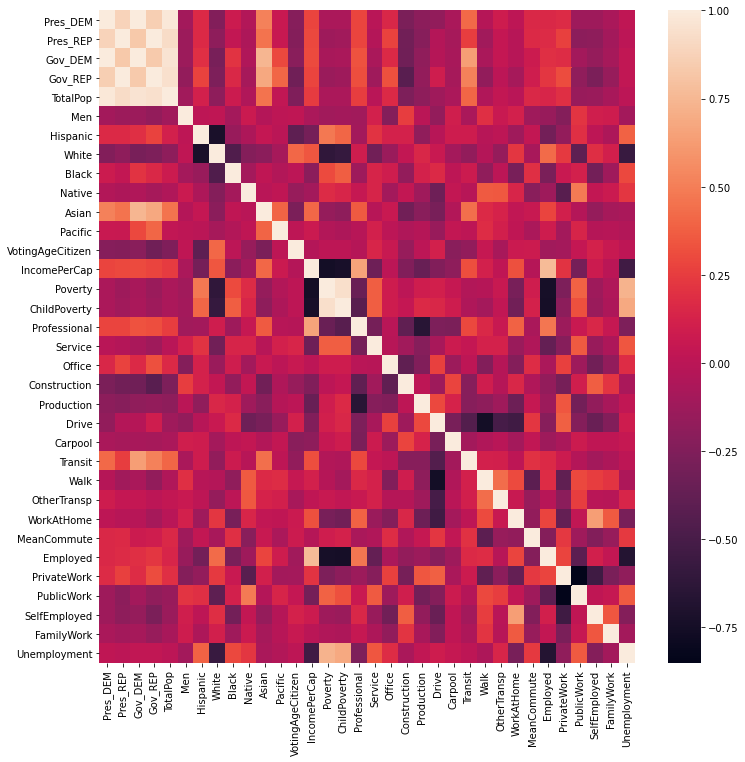

In [62]:
# DataFrame의 corr() 메소드와 Seaborn의 heatmap() 메소드를 이용하여 Pearson's correlation 시각화하기
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr())

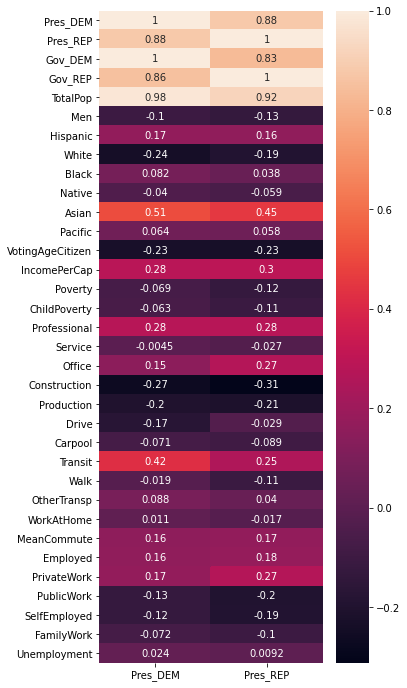

In [63]:
# DataFrame의 corr() 메소드와 Seaborn의 heatmap() 메소드를 이용하여 Pearson's correlation 시각화하기
plt.figure(figsize=(5, 12))
sns.heatmap(df.corr()[['Pres_DEM', 'Pres_REP']], annot=True)

In [64]:
df_norm = df.copy()

In [65]:
df_norm['Pres_DEM'] /= df['Pres_DEM'] + df['Pres_REP']
df_norm['Pres_REP'] /= df['Pres_DEM'] + df['Pres_REP']
df_norm['Gov_DEM'] /= df['Gov_DEM'] + df['Gov_REP']
df_norm['Gov_REP'] /= df['Gov_DEM'] + df['Gov_REP']

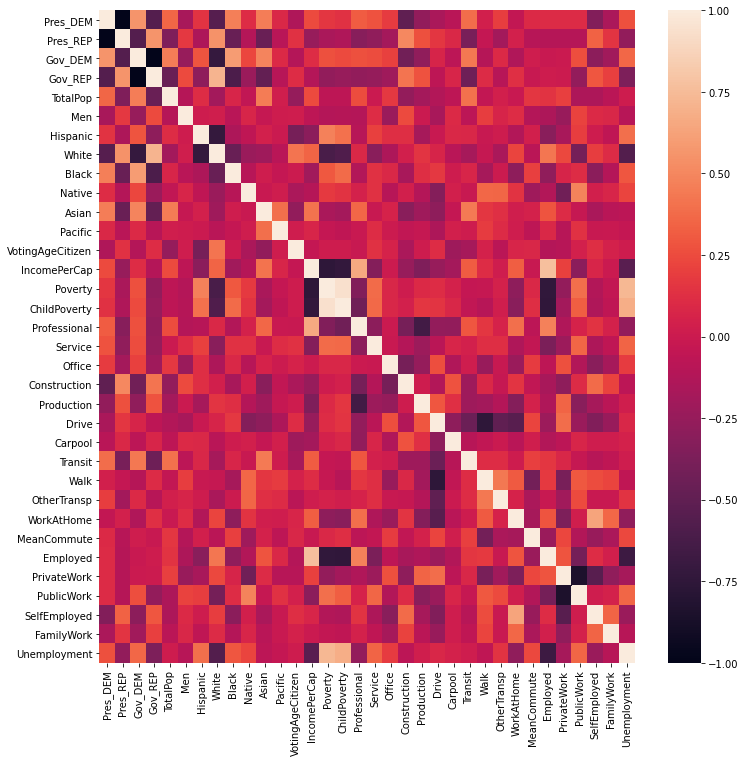

In [66]:
# normalize된 데이터로 다시 correation 확인
plt.figure(figsize=(12, 12))
sns.heatmap(df_norm.corr())

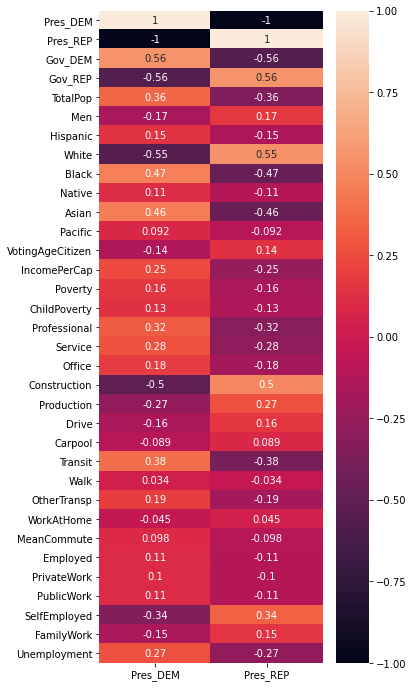

In [67]:
plt.figure(figsize=(5, 12))
sns.heatmap(df_norm.corr()[['Pres_DEM', 'Pres_REP']], annot=True)

### 문제 8. Seaborn을 이용하여 연관성 높은 데이터의 Jointplot 확인

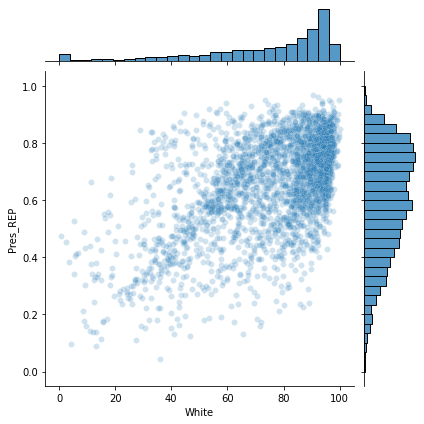

In [80]:
sns.jointplot(x='White', y='Pres_REP', data=df_norm, alpha=0.2)

In [ ]:
sns.jointplot(x='White', y='Pres_REP', hue='Professional', data=df_norm, alpha=0.2)
plt.show()

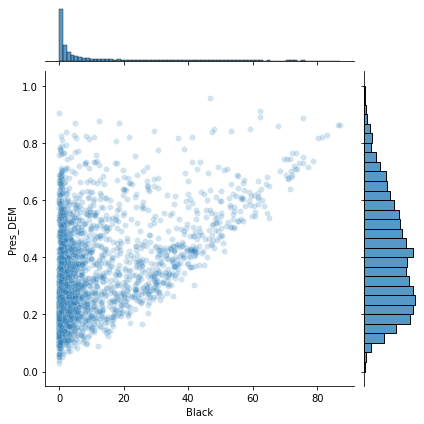

In [82]:
sns.jointplot(x='Black', y='Pres_DEM', data=df_norm, alpha=0.2)

## Step 3. Plotly를 이용하여 데이터 시각화하기


### 문제 9. Plotly의 Choropleth 데이터 포맷으로 맞추기

In [83]:
import plotly.figure_factory as ff

# FIPS 코드 불러오기
df_sample = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/laucnty16.csv')
df_sample['State FIPS Code'] = df_sample['State FIPS Code'].apply(lambda x: str(x).zfill(2))
df_sample['County FIPS Code'] = df_sample['County FIPS Code'].apply(lambda x: str(x).zfill(3))
df_sample['FIPS'] = df_sample['State FIPS Code'] + df_sample['County FIPS Code']

# Color Scale 세팅
colorscale = ["#f7fbff","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
              "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
              "#08519c","#0b4083","#08306b"]

In [85]:
df_sample.head()

LAUS Code State FIPS Code  ... Unemployment Rate (%)   FIPS
0  CN0100100000000              01  ...                   5.3  01001
1  CN0100300000000              01  ...                   5.4  01003
2  CN0100500000000              01  ...                   8.6  01005
3  CN0100700000000              01  ...                   6.6  01007
4  CN0100900000000              01  ...                   5.5  01009

[5 rows x 10 columns]

In [87]:
state_code.head()

State/District Abbreviation Postal Code
0        Alabama         Ala.          AL
1         Alaska       Alaska          AK
2        Arizona        Ariz.          AZ
3       Arkansas         Ark.          AR
4     California       Calif.          CA

In [88]:
state_map = state_code.set_index('State/District')['Postal Code']

In [94]:
counties = df_norm.reset_index()['county'] + ', ' + df_norm.reset_index()['state'].map(state_map)

In [95]:
counties_to_fips = df_sample.set_index('County Name/State Abbreviation')['FIPS']

In [97]:
fips = counties.map(counties_to_fips)

In [98]:
fips

0       01001
1       01003
2       01005
3       01007
4       01009
        ...  
4804    56037
4805    56039
4806    56041
4807    56043
4808    56045
Length: 4809, dtype: object

In [101]:
# ff.create_choropleth()에서 사용할 수 있도록 데이터프레임 정리하기
# Hint) 공식 레퍼런스 참조: https://plotly.com/python/county-choropleth/#the-entire-usa
data = df_norm.reset_index()['Pres_DEM'][fips.notna()]
fips = fips[fips.notna()]

### 문제 10. Choropleth map 시각화하기

In [105]:
# ff.create_choropleth() 메소드를 이용하여 Choropleth 플랏하기
# Hint) 공식 레퍼런스 참조: https://plotly.com/python/county-choropleth/#the-entire-usa

fig = ff.create_choropleth(
    fips=fips, values=data,
    show_state_data=False,
    colorscale=colorscale,
    binning_endpoints=list(np.linspace(0.0, 1.0, len(colorscale) - 2)),
    show_hover=True, centroid_marker={'opacity': 0},
    asp=2.9, title='USA by Voting for DEM Presient'
)

fig.layout.template = None
fig.show()

## Step 4. 모델 학습을 위한 데이터 전처리 

### 문제 11. 학습을 위한 데이터프레임 구성하기

In [106]:
df_norm.columns

Index(['Pres_DEM', 'Pres_REP', 'Gov_DEM', 'Gov_REP', 'TotalPop', 'Men',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific',
       'VotingAgeCitizen', 'IncomePerCap', 'Poverty', 'ChildPoverty',
       'Professional', 'Service', 'Office', 'Construction', 'Production',
       'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
       'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',
       'FamilyWork', 'Unemployment'],
      dtype='object')

In [116]:
# 투표 결과에 해당하는 데이터는 입력 데이터에서 제거한다.
# 예측 타겟은 DEM vs. REP 투표 비율로 한다.
df_norm.dropna(inplace=True)
X = df_norm.drop(['Pres_DEM', 'Pres_REP', 'Gov_DEM', 'Gov_REP'], axis=1)
y = df_norm['Pres_DEM']

### 문제 12. StandardScaler를 이용해 수치형 데이터 표준화하기


In [117]:
from sklearn.preprocessing import StandardScaler

In [118]:
# StandardScaler를 이용해 수치형 데이터를 표준화하기
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X = pd.DataFrame(data=X_scaled, index=X.index, columns=X.columns)

In [119]:
X.head()

TotalPop       Men  ...  FamilyWork  Unemployment
state    county                                 ...                          
Delaware Kent County        0.651462 -0.946145  ...   -0.243581      0.265911
         New Castle County  3.043033 -0.848175  ...   -0.404976      0.192397
         Sussex County      0.917027 -0.818852  ...   -0.404976      0.045370
Indiana  Adams County      -0.213551 -0.230718  ...    0.401999     -0.285443
         Allen County       1.870146 -0.656809  ...   -0.404976      0.118884

[5 rows x 30 columns]

### 문제 13. 학습데이터와 테스트데이터 분리하기


In [120]:
from sklearn.model_selection import train_test_split

In [121]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### 문제 14. PCA를 이용해 데이터 전처리 수행하기

In [122]:
from sklearn.decomposition import PCA

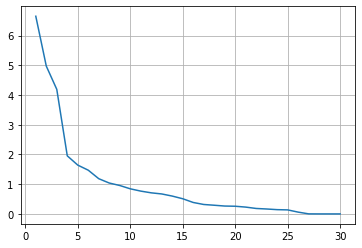

In [124]:
# PCA를 이용해 Dimensionality Reduction 수행하기
pca = PCA()
pca.fit(X_train)
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_)
plt.grid()

In [164]:
pca = PCA(n_components=5)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

## Step 5. Regression 모델 학습하기

### 문제 15. LightGBM Regression 모델 학습하기

In [165]:
from lightgbm import LGBMRegressor

In [169]:
# LGBMRegressor 모델 생성/학습. Feature에 PCA 적용하기
model_reg = LGBMRegressor()
# model_reg.fit(pca.transform(X_train), y_train)
model_reg.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

### 문제 16. Regression 모델 정확도 출력하기

In [167]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report
from math import sqrt

In [170]:
# Predict를 수행하고 mean_absolute_error, rmse, classification_report 결과 출력하기
# pred = model_reg.predict(pca.transform(X_test))
pred = model_reg.predict(X_test)
print(mean_absolute_error(y_test, pred))
print(sqrt(mean_squared_error(y_test, pred)))
print(classification_report(y_test > 0.5, pred > 0.5))

0.053261679672733014
0.07527410114651
              precision    recall  f1-score   support

       False       0.97      0.98      0.97       146
        True       0.80      0.71      0.75        17

    accuracy                           0.95       163
   macro avg       0.88      0.84      0.86       163
weighted avg       0.95      0.95      0.95       163



## Step 6. Classification 모델 학습하기


### 문제 17. XGBoost 모델 생성/학습하기


In [171]:
from xgboost import XGBClassifier

In [177]:
# XGBClassifier 모델 생성/학습
model_cls = XGBClassifier()
model_cls.fit(X_train, y_train > 0.5)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

### 문제 18. Classifier의 Feature Importance 시각화하기


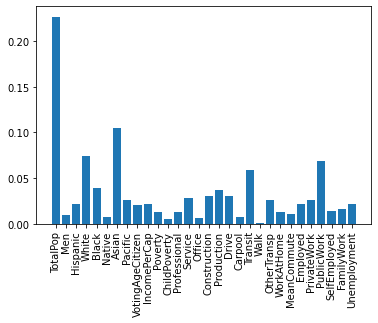

In [181]:
# XGBClassifier 모델의 feature_importances_ 속성 시각화
plt.bar(X.columns, model_cls.feature_importances_)
plt.xticks(rotation=90)
plt.show()

### 문제 19. Classifier 모델 정확도 출력하기

In [182]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_cls.predict(X_test)
print(classification_report(y_test > 0.5, pred))

              precision    recall  f1-score   support

       False       0.96      0.97      0.97       146
        True       0.73      0.65      0.69        17

    accuracy                           0.94       163
   macro avg       0.85      0.81      0.83       163
weighted avg       0.94      0.94      0.94       163

